In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
fsclean = pd.read_csv('ptnewcleanlabel.csv')
fsclean

,ulasan,rating,kategori,nama_produk,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed,ulasan_Stemmed,ulasan_clean,label
0,barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,"['barang', 'sesuai', 'pesanan', 'dan', 'cepat'...","['barang', 'sesuai', 'pesanan', 'dan', 'cepat'...","['barang', 'sesuai', 'pesanan', 'cepat']","['barang', 'sesuai', 'pesan', 'cepat']",barang sesuai pesan cepat,2
1,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,"['barang', 'bagus', 'harga', 'murah']","['barang', 'bagus', 'harga', 'murah']","['barang', 'bagus', 'harga', 'murah']","['barang', 'bagus', 'harga', 'murah']",barang bagus harga murah,2
2,paket rapimantapcepatsampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,"['paket', 'rapimantapcepatsampe', 'ke', 'tujuan']","['paket', 'rapi', 'ke', 'tujuan']","['paket', 'rapi', 'tujuan']","['paket', 'rapi', 'tuju']",paket rapi tuju,2
3,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,"['ya', 'saya', 'puas', 'dgn', 'barangnya']","['ya', 'saya', 'puas', 'dengan', 'barangnya']","['ya', 'puas', 'barangnya']","['ya', 'puas', 'barang']",ya puas barang,2
4,responya luar biasa mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,"['responya', 'luar', 'biasa', 'mantap']","['respon', 'luar', 'biasa', 'mantap']","['respon', 'mantap']","['respon', 'mantap']",respon mantap,2
...,...,...,...,...,...,...,...,...,...,...
1821,barang bagus sesuai deskripsi thanks,5,pertukangan,"Gun Tacker, Staples Tembak Manual 4-8mm TOHO","['barang', 'bagus', 'sesuai', 'deskripsi', 'th...","['barang', 'bagus', 'sesuai', 'deskripsi', 'te...","['barang', 'bagus', 'sesuai', 'deskripsi', 'te...","['barang', 'bagus', 'sesuai', 'deskripsi', 'te...",barang bagus sesuai deskripsi terima kasih,2
1822,produk bagus sudah dicoba untuk kayu yg lunak ...,4,pertukangan,Isi Staples Gun 10mm &#40;3/8&#34;&#41; LICOTA,"['produk', 'bagus', 'sudah', 'dicoba', 'untuk'...","['produk', 'bagus', 'sudah', 'dicoba', 'untuk'...","['produk', 'bagus', 'dicoba', 'kayu', 'lunak',...","['produk', 'bagus', 'coba', 'kayu', 'lunak', '...",produk bagus coba kayu lunak kayu keras seller...,2
1823,packing bagus produk sesuai dan bisa dipake di...,5,pertukangan,Isi Staples Gun 8mm 5/16 Inch SOLID,"['packing', 'bagus', 'produk', 'sesuai', 'dan'...","['packing', 'bagus', 'produk', 'sesuai', 'dan'...","['packing', 'bagus', 'produk', 'sesuai', 'dipa...","['packing', 'bagus', 'produk', 'sesuai', 'paka...",packing bagus produk sesuai pakai staples gun ...,2
1824,mantap bagus kwalitasny,5,pertukangan,Isi Staples Gun 8mm 5/16 Inch SOLID,"['mantap', 'bagus', 'kwalitasny']","['mantap', 'bagus', 'kwalitasny']","['mantap', 'bagus', 'kwalitasny']","['mantap', 'bagus', 'kwalitasny']",mantap bagus kwalitasny,2


In [3]:
Ulasan = fsclean['ulasan_clean']
Ulasan.isnull().sum()

14

In [4]:
Ulasan = fsclean.fillna('tidak ada komentar')

# split data 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fsclean['ulasan_clean'], fsclean['label'], 
                                                    test_size=0.3, stratify=fsclean['label'], random_state=30)

In [6]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Make sure to update labels accordingly

X_test = X_test.dropna()
y_test = y_test[X_test.index] 
# Check if there are still NaN values
print("NaN in X_train:", X_train.isnull().any())
print("NaN in X_test:", X_test.isnull().any())

NaN in X_train: False
NaN in X_test: False


# N-GRAM

In [7]:
vectorizer = CountVectorizer(decode_error='replace', encoding='utf-8', ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
print("Shape after n-gram Count Vectorization:")
print("X_train_count.shape:", X_train.shape)
print("X_test_count.shape:", X_test.shape)

Shape after n-gram Count Vectorization:
X_train_count.shape: (1265, 3898)
X_test_count.shape: (547, 3898)


# RESAMPLING

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1:1195, 0:1195})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

label
2    1195
1    1195
0    1195
Name: count, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Menggunakan Random Under-sampling hanya pada kelas tertentu
under_sampler = RandomUnderSampler(sampling_strategy={2: 1195})
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled.value_counts()

label
0    1195
1    1195
2    1195
Name: count, dtype: int64

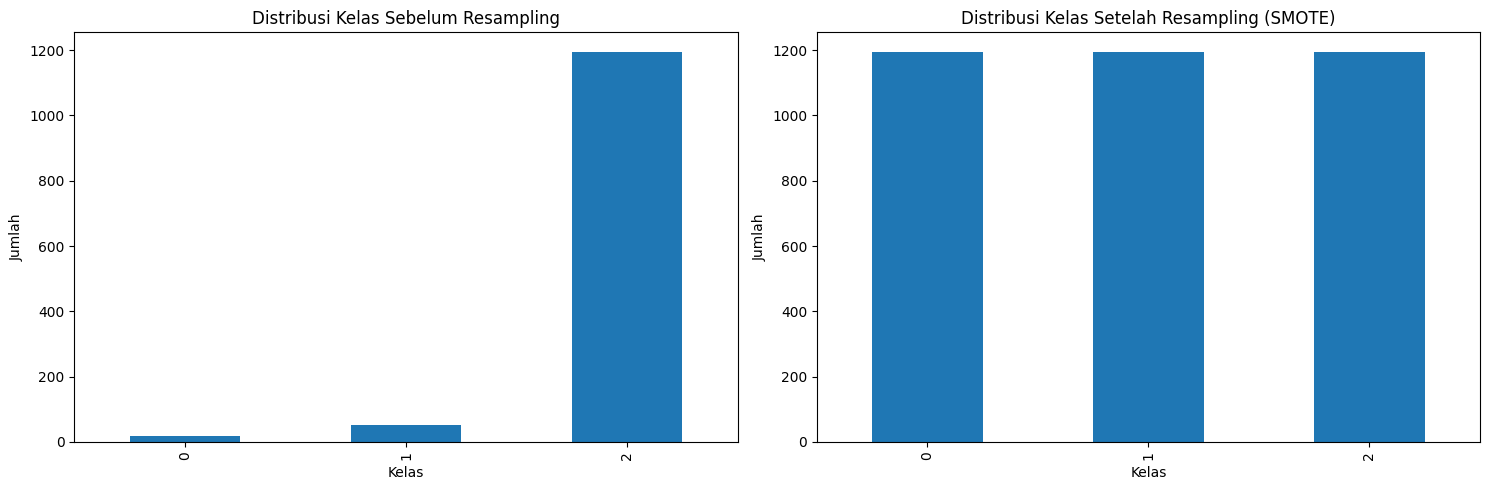

In [11]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas sebelum dan setelah resampling
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Setelah Resampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# MelakukanPrediksi

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Klasifikasi menggunakan Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.14      0.03         7
           1       0.08      0.26      0.12        23
           2       0.96      0.77      0.85       517

    accuracy                           0.74       547
   macro avg       0.35      0.39      0.33       547
weighted avg       0.91      0.74      0.81       547



In [13]:
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.07      0.17      0.10        23
           2       0.95      0.83      0.88       517

    accuracy                           0.79       547
   macro avg       0.34      0.33      0.33       547
weighted avg       0.90      0.79      0.84       547



In [14]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.29      0.06         7
           1       0.07      0.26      0.11        23
           2       0.96      0.74      0.84       517

    accuracy                           0.71       547
   macro avg       0.35      0.43      0.33       547
weighted avg       0.91      0.71      0.80       547



In [15]:
# Klasifikasi menggunakan Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
nb_predictions = nb_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Naive Bayes
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.06      0.22      0.09        23
           2       0.95      0.77      0.85       517

    accuracy                           0.74       547
   macro avg       0.33      0.33      0.31       547
weighted avg       0.90      0.74      0.81       547



In [16]:
# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_classifier.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.57      0.06         7
           1       0.06      0.52      0.10        23
           2       0.98      0.39      0.56       517

    accuracy                           0.40       547
   macro avg       0.36      0.49      0.24       547
weighted avg       0.93      0.40      0.53       547

